<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/PracticaRegresionLinealSimple_RESUELTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Delgadillo, Margarita Cristina
*   Matrícula: 255879

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [ ]:
# Carga de datos y bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

print('Primeras 5 filas\n', df.head())
print('\nInformación estadística\n', df.describe())
print(df.info())


Primeras 5 filas
    poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

Información estadística
        poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**
 - La relación entre las variables sí parece lineal  y se puede observar que a medida que la población aumenta, la ganancia lo hace también; sin embargo, no es una linealidad perfecta, ya que hay valores atípicos y dispersos que le están afectando.

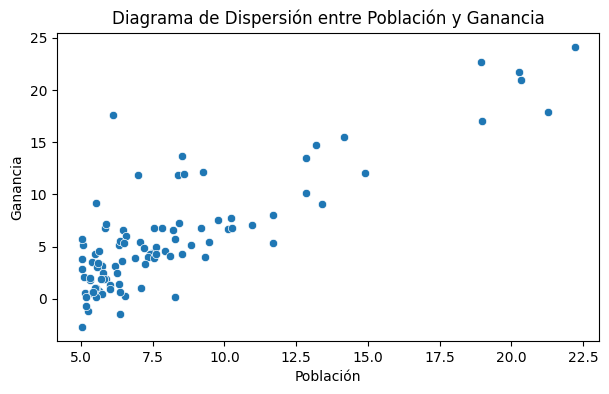

In [ ]:
# Diagrama de dispersión
plt.figure(figsize=(7, 4))
sns.scatterplot(x='poblation', y='profit', data=df)
plt.title('Diagrama de Dispersión entre Población y Ganancia')
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
 - La relación es fuerte más no perfecta ya que es 0.837873232526341, un número que casi se acerca a 1*(relación perfecta positiva)*.
- ¿Es positiva o negativa?
 - Positiva
- ¿Es coherente con el gráfico anterior?
 - Si, ya que se puede ver que cuando aumenta la población, aumenta la ganancia.

Coeficiente de correlación de Pearson: 0.837873232526341
La relación es positiva



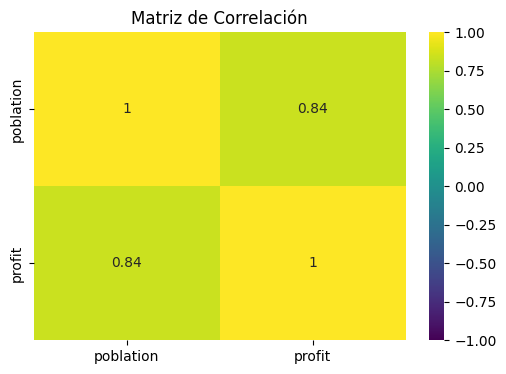

In [ ]:
# Cálculo de correlación
correlacion = df['poblation'].corr(df['profit'])
print(f'Coeficiente de correlación de Pearson: {correlacion}')

if correlacion == 1:
  print('La relación es perfecta positiva\n')
elif correlacion > 0 and correlacion != 1:
  print('La relación es positiva\n')
elif correlacion == 0:
  print('No hay relación lineal\n')
elif correlacion < 0 and correlacion != -1:
  print('La relación es negativa\n')
else:
  print('La relación es perfecta negativa\n')

# Crear la matriz de correlación (default -> Pearson)
corr_pearson = df[['poblation', 'profit']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_pearson, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
 - El intercepto es el valor de ganancia cuando la población es 0. En este caso la ganancia es -3.8957808783118484 para población 0. Esto se puede interpretar que en vez de ganancia, se tuvo una pérdida cuando no hay población
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?
 - El coeficiente(pendiente) en este problema, es el valor que aumenta la ganancia cada vez que aumenta la población (si poblation = 1, profit = 1.1930336441895932; si poblation = 2, profit = 2.3860672883791864)

In [ ]:
# Construcción del modelo  y Coeficientes del modelo
modelo = LinearRegression()
modelo.fit(df[['poblation']], df['profit'])

print('Intercepto:', modelo.intercept_)
print('Coeficiente:', modelo.coef_[0])

Intercepto: -3.8957808783118484
Coeficiente: 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

Text(0, 0.5, 'Ganancia')

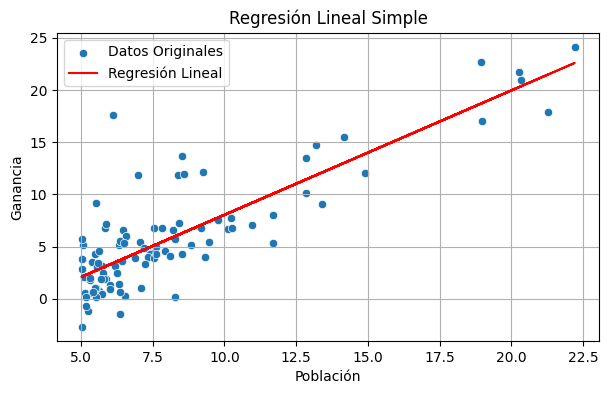

In [ ]:
# Visualización del modelo ajustado

# Asignación de nuevos valores a todas
# las filas de la columna 'regresion'
df.loc[:, 'regresion'] = modelo.predict(df[['poblation']]) # regresión ajustada

plt.figure(figsize=(7, 4))
sns.scatterplot(x='poblation', y='profit', data=df, label='Datos Originales')
plt.plot(df[['poblation']], df['regresion'], color='red', label='Regresión Lineal')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True)
plt.xlabel('Población')
plt.ylabel('Ganancia')

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?
 - Revisando visualmente la gráfica, los residuos se aproximan a una distribución normal, pero no una normal perfecta. Hay una ligera asimetría y sesgo a la derecha

Text(0.5, 0, 'Residuos')

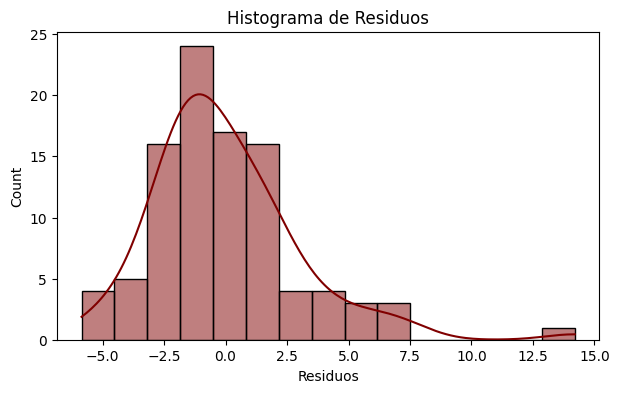

In [ ]:
# Normalidad de los residuos
residuos = df['profit'] - df['regresion']
plt.figure(figsize=(7, 4))
sns.histplot(residuos, kde=True, bins=15, color='maroon')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    normality_tests(data, column)


Pruebas de normalidad para la columna: poblation
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00033
Anderson-Darling Test: Estadístico = 8.60563
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000

Pruebas de normalidad para la columna: profit
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00492
Anderson-Darling Test: Estadístico = 4.00004
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de signifi

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?
 - Al observar la gráfica, se aprecia que los residuos se dispersan de manera aleatoria sin mostrar un patrón claro, como una curva o un embudo, lo que comprueba la homocedasticidad.

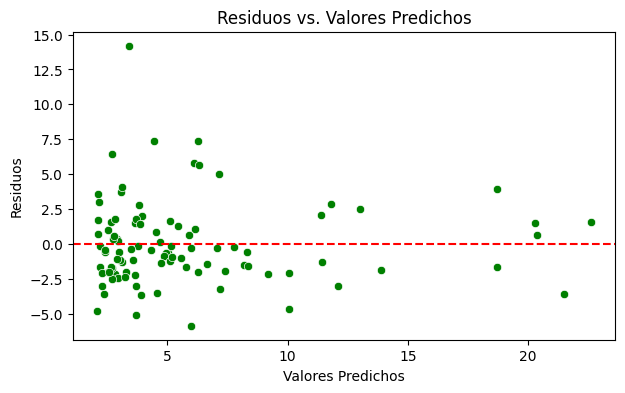

In [ ]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df['regresion'], y=residuos, color='green')
plt.title('Residuos vs. Valores Predichos')
plt.axhline(y=0, color='red', linestyle='--') # Línea horizontal en 0
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:
  - a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal
    - La gran mayoría de los residuos siguen una distribución normal, excepto en los extremos, en especial el extremo derecho.
  - b) Desviaciones sistemáticas indican asimetría o colas pesadas.
    - Se observa un desvío en los extremos, especialmente el extremo derecho. Esto comprueba lo mencionado en el punto 4.1 sobre una ligera asimetría y un sesgo a la derecha(positiva).

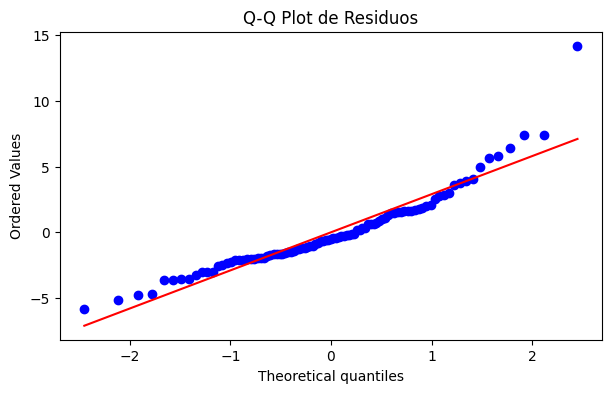

In [ ]:
# Q-Q Plot
plt.figure(figsize=(7, 4))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?
 - El MSE nos muestra el promedio de errores al cuadrado entre los valores predichos y lo reales. Por sí solo no es tan bueno, por estar al cuadrado pero al combinarlo con el RMSE, nos ayuda a ver que tan ajustado está el modelo a los datos. En este caso el RMSE es aprox. 3 que indica que los valores predichos se desvían 3 puntos de los valores reales.
 Comparando con el rango total de `profit` (26.8277) el error es relativamente pequeño.
 - El R² muestra que el modelo explica aprox. el 70.20% de la variablilidad de los datos, lo que implica un ajuste moderado pero aun hay 29.80% que no se captura. Esto tal vez pueda mejorarse con un modelo más complejo.

In [ ]:
# Evaluación del modelo
mse = mean_squared_error(df['profit'], df['regresion'])
rmse = np.sqrt(mse)
r2 = r2_score(df['profit'], df['regresion'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MSE: 8.953942751950358
RMSE: 2.9923139460876023
R²: 0.7020315537841397


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
 - El modelo es útil ya que logra explicar aprox. el 70.20% de la variabilidad de la ganancia, a pesar de ser un modelo simple.
- ¿Qué limitaciones encuentras?
 - Al ser un modelo de regresión lineal simple solo compara la relación lineal entre dos variables, que significa que no toma en cuenta otros factores que pueden afectar la ganancia, aparte de la población. La existencia de valores atípicos también le puede estar afectando, como se puede observar en las distribucion de los datos, que se aproxima a la normal pero tiene asimetría y sesgo a la derecha.
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.
 - En mi opinión, no es necesario realizar un ajuste o estandarización, ya que el modelo explica alrededor de 70% de la variación en la ganancia, lo cual es aceptable para un modelo de regresión lineal simple. Aunque siempre se puede intentar una mejoría, en este caso los resultados son razonables. Además, la normalización solo estaría cambiando la escala de los datos pero no la distribución de las variables ni su relación.